In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
# from numba import jit, vectorize
from joblib import load,dump


In [3]:
os.getcwd()

'c:\\Users\\laudi\\OneDrive\\Desktop\\Tesi_workspace\\repository\\3 preparation\\python training\\jupyter files'

In [246]:
# def xi_transformation(xi_real):
#     if xi_real < 0.3:  #20%
#         return "Very Low"
#     elif xi_real < 2.2: #40%
#         return "Low"
#     elif xi_real < 5.7: #60%
#         return "Medium"
#     elif xi_real < 13.9: #80%
#         return "High"
#     else:               #over 80%
#         return "Very High"

In [247]:
# def xi_transformation(xi_real):
#     if xi_real < 1.39:  #33%
#         return "Low"
#     elif xi_real < 7.25: #66%
#         return "Medium"
#     else:                #over 66%
#         return "High"
    

In [248]:
# def xi_transformation(xi_real):
#     if xi_real < 1.39:  #33%
#         return 1 #"Low"
#     elif xi_real < 7.25: #66%
#         return 2 #"Medium"
#     else:                #over 66%
#         return 3 #"High"
    

In [249]:
# def xi_transformation(xi_real):
#     if xi_real < 1.39:  #33%
#         return 1 #"Low"
#     elif xi_real < 7.25: #66%
#         return 2 #"Medium"
#     else:                #over 66%
#         return 3 #"High"
    

In [250]:
# def xi_transformation(xi_real):
#     if xi_real < 3.7:  #50%
#         return 0 
#     else:                #over 50%
#         return 1
    


In [ ]:
# df_training.xi_real.describe(percentiles=[0.2,0.4,0.6,0.8])
# df_training.xi_real.describe(percentiles=[0.33,0.66])

In [ ]:
# df_training = pd.read_csv(r"C:\Users\laudi\OneDrive\Desktop\Tesi_workspace\repository\3 preparation\python training\csv\training_set_gpt2.csv")
#df_test = pd.read_csv(r"C:\Users\laudi\OneDrive\Desktop\Tesi_workspace\repository\3 preparation\python training\csv\test_set_gpt2.csv")  

In [4]:
df = pd.read_csv(r"C:\Users\laudi\OneDrive\Desktop\Tesi_workspace\repository\1 csv\patent_data_RAW.csv")

In [5]:
df_training = df.sample(200000, random_state=1998)

In [6]:
def winsorizing (x):
    min_q, max_q = y.quantile([0.01, 0.99])
    if x<=min_q:
        return min_q
    elif x>=max_q:
        return max_q
    else:
        return x

In [7]:
y = df_training.xi_real

In [255]:
type(np.nan)

float

In [256]:
y.describe()

count    200000.000000
mean         11.762815
std          32.758455
min           0.000048
25%           0.665920
50%           3.654593
75%          10.671995
max        2708.877700
Name: xi_real, dtype: float64

In [8]:
min_q, max_q = y.quantile([0.01, 0.99])

def trimming(x):
    if x<min_q:
        return np.nan
    elif x>max_q:
        return np.nan
    else:
        return x

In [9]:
%time df_training["new_xi_real"] = df_training.xi_real.apply(trimming)
df_training.dropna(inplace=True , subset=["new_xi_real"])

CPU times: total: 0 ns
Wall time: 36 ms


In [259]:
len(df_training)

196001

In [10]:
X = df_training.abstract
#.apply(xi_transformation)
y = df_training["new_xi_real"]


In [261]:
y

1220007    1.592511
344899     0.385012
1116045    0.092582
184501     2.205415
478813     0.867688
             ...   
464187     0.057892
1596968    5.073823
190325     0.130212
459081     0.507945
600669     3.642887
Name: new_xi_real, Length: 196001, dtype: float64

In [262]:
cou_vec = CountVectorizer(  analyzer='word', 
                           ngram_range=(1, 1), 
                            stop_words = "english",
                            max_df=0.90,
                            min_df=0.005, 
                            )


In [263]:
X2 = cou_vec.fit_transform(X)

In [13]:
cou_vec = load(r'C:\Users\laudi\OneDrive\Desktop\Tesi_workspace\repository\3 preparation\python training\bin and pickles pipelines\CountVec.bin')
X2 = cou_vec.transform(X)

In [14]:
X2

<196001x1392 sparse matrix of type '<class 'numpy.int64'>'
	with 4752822 stored elements in Compressed Sparse Row format>

In [265]:
dump(cou_vec, r'C:\Users\laudi\OneDrive\Desktop\Tesi_workspace\repository\3 preparation\python training\bin and pickles pipelines\CountVec.bin', compress=True)

['C:\\Users\\laudi\\OneDrive\\Desktop\\Tesi_workspace\\repository\\3 preparation\\python training\\bin and pickles pipelines\\CountVec.bin']

In [15]:
final_X = pd.DataFrame(X2.toarray(), columns=cou_vec.get_feature_names_out())

## Train Test and Adjustments

In [16]:
X_train, X_test, y_train, y_test = train_test_split(final_X, y, random_state=1998, test_size=0.2)
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [43]:
X_test.shape

(39201, 30)

In [269]:
dump(scaler_X, r'C:\Users\laudi\OneDrive\Desktop\Tesi_workspace\repository\3 preparation\python training\bin and pickles pipelines\std_scaler_X.bin', compress=True)

['C:\\Users\\laudi\\OneDrive\\Desktop\\Tesi_workspace\\repository\\3 preparation\\python training\\bin and pickles pipelines\\std_scaler_X.bin']

In [270]:
y_train

1122481     1.231740
1760676    17.977823
66304       9.130425
659174      3.855198
1778679     6.255772
             ...    
1475809     0.532542
1148878     0.082810
541246      3.646479
1253803     0.904748
1978131     5.000009
Name: new_xi_real, Length: 156800, dtype: float64

In [17]:
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = scaler_y.transform(np.array(y_test).reshape(-1,1))

In [273]:
dump(scaler_y, r'C:\Users\laudi\OneDrive\Desktop\Tesi_workspace\repository\3 preparation\python training\bin and pickles pipelines\std_scaler_y.bin', compress=True)

['C:\\Users\\laudi\\OneDrive\\Desktop\\Tesi_workspace\\repository\\3 preparation\\python training\\bin and pickles pipelines\\std_scaler_y.bin']

In [274]:
np.unique(y_train)

array([-0.58255228, -0.5825509 , -0.58255013, ...,  7.39891578,
        7.40220875,  7.40225031])

## LDA

In [ ]:
# lda_model = LinearDiscriminantAnalysis(n_components=2 )

In [ ]:
# X_train = lda_model.fit_transform(X_train, y_train)

In [ ]:
# prediction = lda_model.predict(X_test)

In [ ]:
# X_test = lda_model.transform(X_test)

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [275]:
pca = PCA(n_components=30)
pca.fit(X_train,y_train)


PCA(n_components=30)

In [276]:
dump(pca, r'C:\Users\laudi\OneDrive\Desktop\Tesi_workspace\repository\3 preparation\python training\bin and pickles pipelines\pca.bin', compress=True)

['C:\\Users\\laudi\\OneDrive\\Desktop\\Tesi_workspace\\repository\\3 preparation\\python training\\bin and pickles pipelines\\pca.bin']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

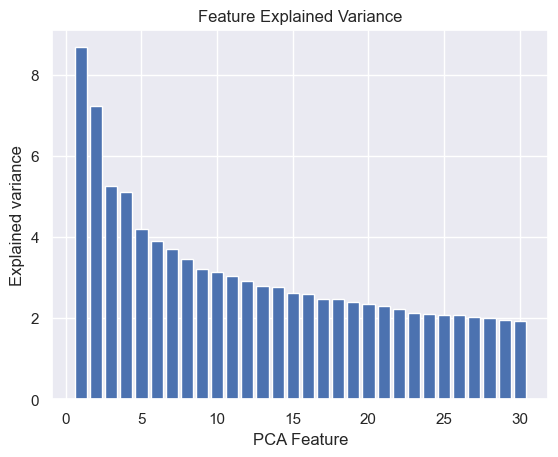

In [277]:

plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [18]:
pca = load(r'C:\Users\laudi\OneDrive\Desktop\Tesi_workspace\repository\3 preparation\python training\bin and pickles pipelines\pca.bin')

In [19]:
X_train  = pca.transform(X_train)

In [20]:
X_test = pca.transform(X_test)

In [21]:
X_train.shape

(156800, 30)

## Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import sklearn
from xgboost import XGBRegressor

In [ ]:
# sklearn.metrics.get_scorer_names()

#### Random forest

In [24]:
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train, y_train)

C:\Users\laudi\AppData\Local\Temp\ipykernel_13688\2378266793.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1)

In [282]:
dump(rf, r'C:\Users\laudi\OneDrive\Desktop\Tesi_workspace\repository\3 preparation\python training\bin and pickles pipelines\model_RandFor.bin', compress=True)

['C:\\Users\\laudi\\OneDrive\\Desktop\\Tesi_workspace\\repository\\3 preparation\\python training\\bin and pickles pipelines\\model_RandFor.bin']

In [35]:
y_pred_rf = rf.predict(X_test)

In [36]:
print(mean_absolute_percentage_error(y_test, y_pred_rf))
print(mean_absolute_error(y_test, y_pred_rf))
print(mean_squared_error(y_test, y_pred_rf))
print(np.sqrt(mean_squared_error(y_test, y_pred_rf)))

3.2433595184161716
0.6021314097971481
0.9172512442173765
0.9577323447693392


In [285]:
y_pred

array([-0.22547344, -0.18454608,  0.5461068 , ...,  0.15058797,
        0.42079523, -0.38938826])

2.847434805314282

0.6176948912161953

0.9825959402270507

0.9912597743412424

In [ ]:
rf = RandomForestRegressor(n_jobs=-1)
cross_val_score(rf , X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

c:\Users\laudi\anaconda3\envs\work\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\laudi\anaconda3\envs\work\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\laudi\anaconda3\envs\work\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\laudi\anaconda3\envs\work\lib\site-packages\sklearn\model_selection\_validation.py:686: Dat

array([-0.62495645, -0.61230044, -0.61974821, -0.61410495, -0.62078804])

In [288]:
print(scaler_y.inverse_transform( y_pred[2].reshape(-1,1)))
print(scaler_y.inverse_transform(y_test[2].reshape(-1,1)))

[[18.47471143]]
[[2.9213526]]


(array([1.7070e+04, 1.7817e+04, 3.6290e+03, 5.2600e+02, 9.1000e+01,
        2.7000e+01, 3.0000e+01, 9.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.87245982e-02, 9.10870516e+00, 1.81986857e+01, 2.72886663e+01,
        3.63786468e+01, 4.54686274e+01, 5.45586080e+01, 6.36485885e+01,
        7.27385691e+01, 8.18285496e+01, 9.09185302e+01]),
 <BarContainer object of 10 artists>)

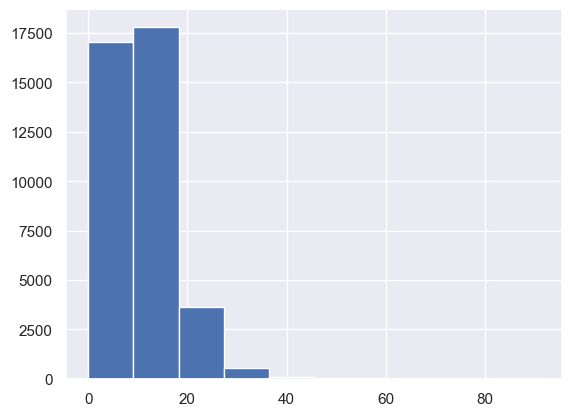

In [291]:
plt.hist(scaler_y.inverse_transform( y_pred.reshape(-1,1)))

In [292]:
scal = scaler_y.inverse_transform( y_pred.reshape(-1,1))

In [293]:
scal[scal<0]

array([], dtype=float64)


56.10748920361494
12.094678173279037

#### Linear regresiojn


In [30]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred_lreg = lreg.predict(X_test)

In [33]:
print(mean_absolute_percentage_error(y_test, y_pred_lreg))
print(mean_absolute_error(y_test, y_pred_lreg))
print(mean_squared_error(y_test, y_pred_lreg))
print(np.sqrt(mean_squared_error(y_test, y_pred_lreg)))

2.093404420195895
0.5747173498937292
0.9032132142881163
0.9503753018087729


In [37]:
print(mean_absolute_percentage_error(y_test, y_pred_rf))
print(mean_absolute_error(y_test, y_pred_rf))
print(mean_squared_error(y_test, y_pred_rf))
print(np.sqrt(mean_squared_error(y_test, y_pred_rf)))

3.2433595184161716
0.6021314097971481
0.9172512442173765
0.9577323447693392


#### XGBoost

In [39]:
xgb = XGBRegressor()

In [40]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
y_pred_xgb = xgb.predict(X_test)

In [44]:
dump(xgb, r'C:\Users\laudi\OneDrive\Desktop\Tesi_workspace\repository\3 preparation\python training\bin and pickles pipelines\model_XGBoost.bin', compress=True)

['C:\\Users\\laudi\\OneDrive\\Desktop\\Tesi_workspace\\repository\\3 preparation\\python training\\bin and pickles pipelines\\model_XGBoost.bin']

In [1]:
print(mean_absolute_percentage_error(y_test, y_pred_xgb))
print(mean_absolute_error(y_test, y_pred_xgb))
print(mean_squared_error(y_test, y_pred_xgb))
print(np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

NameError: name 'mean_absolute_percentage_error' is not defined

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
linear = pd.Series([2.0934,0.5747,0.9504,0.9032])
randfor = pd.Series(
[3.2433,
0.6021,
0.9577,
0.9173])
xgboost = pd.Series(
    [2.3904,
    0.5690,
    0.9502,
    0.9030])

new = pd.DataFrame()
new["linear Regression"]=linear
new["random forest"] = randfor
new["xgboost"] = xgboost

In [4]:
new.index = ["MAPE","MAE","RMSE","MSE"]

In [5]:
new

,linear Regression,random forest,xgboost
MAPE,2.0934,3.2433,2.3904
MAE,0.5747,0.6021,0.5690
RMSE,0.9504,0.9577,0.9502
MSE,0.9032,0.9173,0.9030


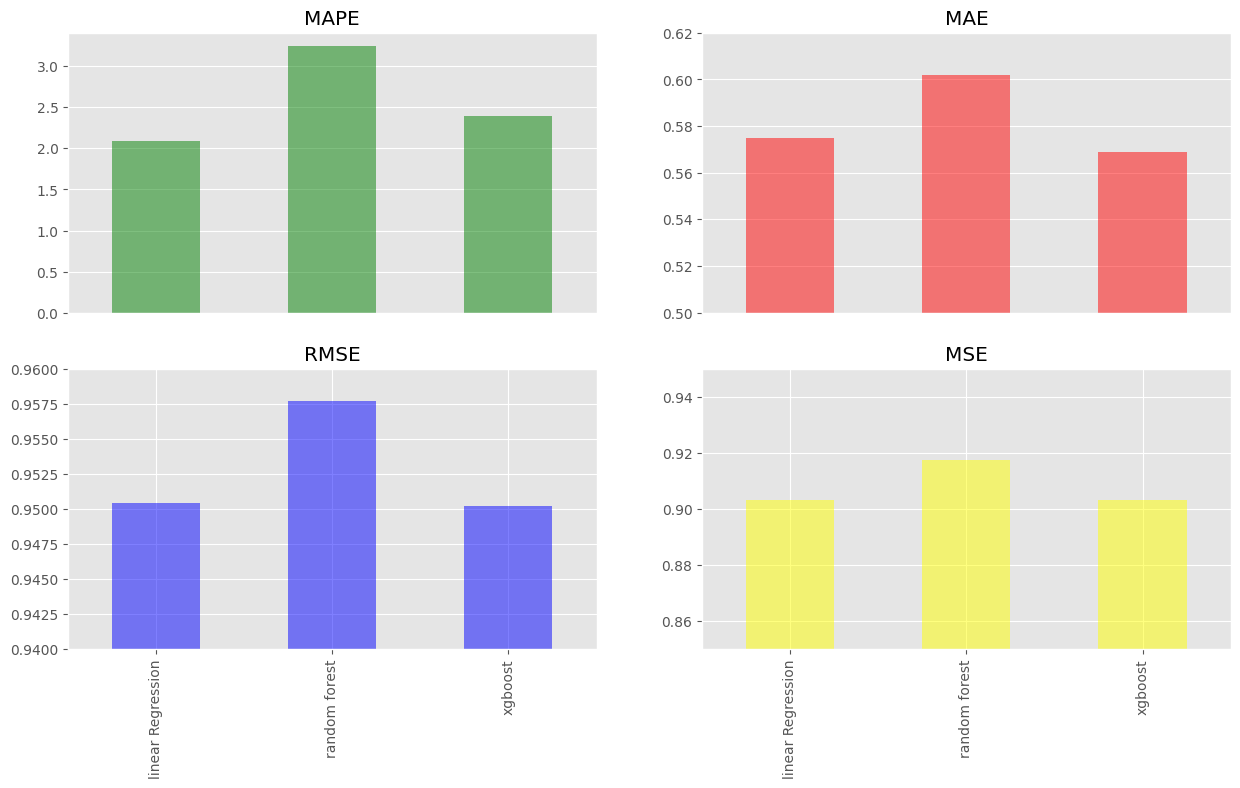

In [26]:

plt.style.use('ggplot')
fig, ax = plt.subplots(2,2, figsize=(15,8))
new.loc["MAPE"].plot(kind ="bar", ax = ax[0,0], color ="green", alpha=0.5)
ax[0,0].set_title("MAPE")
ax[0,0].set_xticks([])
new.loc["MAE"].plot(kind ="bar", ax = ax[0,1], color ="red", alpha=0.5)
ax[0,1].set_title("MAE")
ax[0,1].set_xticks([])
ax[0,1].set_ylim((0.5,0.62))
new.loc["RMSE"].plot(kind ="bar", ax = ax[1,0], color ="blue", alpha=0.5)
ax[1,0].set_title("RMSE")
ax[1,0].set_ylim((0.94,0.96))
new.loc["MSE"].plot(kind ="bar", ax = ax[1,1], color ="yellow", alpha=0.5)
ax[1,1].set_title("MSE")
ax[1,1].set_ylim((0.85,0.95))
plt.show()